# Lab 14 - Classification and Logistic Regression

Note: Some of this lab is based off the Harvard Data Science CS109 Lab 4, Fall 2015.

We now move on to *classification*, which means predicting categorical data.  In this lab, we cover *logistic regression* which adapts linear regression to the prediction of one of two categories.

In logistic regression, we fit a *sigmoid function* to the data.  Run the code below to see two examples of sigmoid functions.

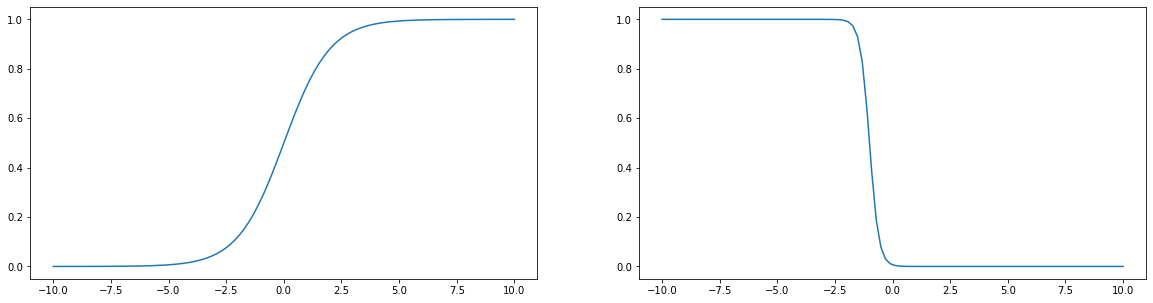

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

xx = np.linspace(-10,10,100)
yy1 = 1/(1 + np.exp(-xx))
yy2 = 1/(1 + np.exp(5*xx +5))

fig, ax = plt.subplots(1, 2, figsize=(20, 5))


ax[0].plot(xx,yy1)
ax[1].plot(xx,yy2)

The equation of the sigmoid function is: 

$$f(x_1, x_2, ..., x_n) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n)}}$$

Notice that the exponent of $e$ looks like part of the linear regression equation.  This is not a coincidence!

### Section 1: Loading and cleaning the data, and exploratory data analysis

The Challenger Space Shuttle tragically exploded in 1986, killing all astronauts on board.  The explosion was shown to have been caused by an O-ring failure, likely due to cold temperatures the day of the launch (and also poor engineering that allowed this failure to cause such catastrophy).

This lab will use experimental data from tests on whether O-rings failed at different temperatures.  The data set can be downloaded from [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/chall.txt](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/chall.txt).

Each row in the data represents one experiment.  The first column is the temperature in Fahrenheit that the experiment was conducted at, and the second column is 1 if the O-ring failed in that experiment, and 0 if it did not. 

Import the necessary libraries.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf


%matplotlib inline

Open the data file in Jupyter notebook or another text editor.  What do you notice about it?  What needs to be changed or added when we read in the data?

See Lab 4 for a reminder on how to deal with the spaces separating the columns instead of commas.

We can add column names directly in `read_csv()`.  To do so, add the parameters: `header = None` and `names = ["Temperature", "Failure"]`.

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/chall.txt", sep="\s+", header=None, names=["Temperature", "Failure"])

<details><summary>Answer:</summary>
<code>data = pd.read_csv("chall.txt",sep = "\s+", header = None, names = ["Temperature", "Failure"])</code>
</details>

Create a scatter plot with temperature on the x axis and failure on the y axis.

<AxesSubplot:xlabel='Temperature', ylabel='Failure'>

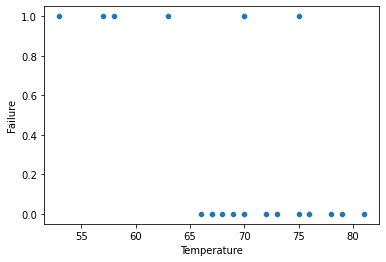

In [6]:
sns.scatterplot(x="Temperature", y="Failure", data=data)

What do you notice about the graph?

### Section 2: Logistic regression

We will now use statsmodel to fit a logistic regression model to the data.  Notice that the code is similar to when we fit a linear regression model to the data.  What is the independent variable?  What is the dependent variable?

In [7]:
logit_model = smf.logit('Failure ~ Temperature',data).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Failure   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Mar 2022   Pseudo R-squ.:                  0.2813
Time:                        12:18:32   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
Covariance Type:            nonrobust   LLR p-value:                  0.004804
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.0429      7.379      2.039      0.041       0.581      29.505
Temperature    -0.2322      0.108     -2.145      0.032      -0.444      -0.020
===============================================================================
"""

Is there an R-squared value in the summary?  

To get the formula for the model, we plug the intercept and variable coefficients into the sigmoid equation at the start of the lab.  The intercept coefficient 15.0429 replaces $\beta_0$ and the temperature coefficient -0.2322 replaces $\beta_1$.  $x_1$ will represent the temperature variable in the equation.

$$y = \frac{1}{1 + e^{-(15.0429 -0.2322x_1)}}$$


There is another way to get the model parameters:

In [8]:
logit_model.params

Intercept      15.042902
Temperature    -0.232163
dtype: float64

We can use these parameters to graph the model equation on the data.  

First, create 200 evenly spaced x values (look at the data to see what their range should be): 

In [9]:
x = np.linspace(50, 85, 200)
x

array([50.        , 50.1758794 , 50.35175879, 50.52763819, 50.70351759,
       50.87939698, 51.05527638, 51.23115578, 51.40703518, 51.58291457,
       51.75879397, 51.93467337, 52.11055276, 52.28643216, 52.46231156,
       52.63819095, 52.81407035, 52.98994975, 53.16582915, 53.34170854,
       53.51758794, 53.69346734, 53.86934673, 54.04522613, 54.22110553,
       54.39698492, 54.57286432, 54.74874372, 54.92462312, 55.10050251,
       55.27638191, 55.45226131, 55.6281407 , 55.8040201 , 55.9798995 ,
       56.15577889, 56.33165829, 56.50753769, 56.68341709, 56.85929648,
       57.03517588, 57.21105528, 57.38693467, 57.56281407, 57.73869347,
       57.91457286, 58.09045226, 58.26633166, 58.44221106, 58.61809045,
       58.79396985, 58.96984925, 59.14572864, 59.32160804, 59.49748744,
       59.67336683, 59.84924623, 60.02512563, 60.20100503, 60.37688442,
       60.55276382, 60.72864322, 60.90452261, 61.08040201, 61.25628141,
       61.4321608 , 61.6080402 , 61.7839196 , 61.95979899, 62.13

Next, we can compute $\beta_0 + \beta_1 x$ for all of these x values:

In [10]:
p = logit_model.params
reg = p['Intercept'] + x*p['Temperature']
reg

array([ 3.43476444,  3.39393179,  3.35309915,  3.31226651,  3.27143386,
        3.23060122,  3.18976858,  3.14893593,  3.10810329,  3.06727065,
        3.026438  ,  2.98560536,  2.94477272,  2.90394007,  2.86310743,
        2.82227478,  2.78144214,  2.7406095 ,  2.69977685,  2.65894421,
        2.61811157,  2.57727892,  2.53644628,  2.49561364,  2.45478099,
        2.41394835,  2.37311571,  2.33228306,  2.29145042,  2.25061778,
        2.20978513,  2.16895249,  2.12811985,  2.0872872 ,  2.04645456,
        2.00562192,  1.96478927,  1.92395663,  1.88312399,  1.84229134,
        1.8014587 ,  1.76062606,  1.71979341,  1.67896077,  1.63812812,
        1.59729548,  1.55646284,  1.51563019,  1.47479755,  1.43396491,
        1.39313226,  1.35229962,  1.31146698,  1.27063433,  1.22980169,
        1.18896905,  1.1481364 ,  1.10730376,  1.06647112,  1.02563847,
        0.98480583,  0.94397319,  0.90314054,  0.8623079 ,  0.82147526,
        0.78064261,  0.73980997,  0.69897733,  0.65814468,  0.61

Finally we can plug `reg` into the logistic equation to get the y values:

In [11]:
y = 1/(1 + np.exp(-reg))
y

array([0.96877352, 0.96751435, 0.96620618, 0.96484724, 0.96343572,
       0.96196975, 0.96044743, 0.95886677, 0.95722576, 0.95552232,
       0.95375432, 0.95191957, 0.95001585, 0.94804087, 0.94599228,
       0.94386771, 0.94166472, 0.93938081, 0.93701348, 0.93456013,
       0.93201815, 0.9293849 , 0.92665767, 0.92383375, 0.92091037,
       0.91788477, 0.91475413, 0.91151565, 0.90816649, 0.90470381,
       0.90112478, 0.89742658, 0.89360639, 0.88966141, 0.88558888,
       0.88138608, 0.87705033, 0.872579  , 0.86796954, 0.86321948,
       0.85832641, 0.85328805, 0.84810222, 0.84276687, 0.83728007,
       0.83164005, 0.82584521, 0.8198941 , 0.8137855 , 0.80751834,
       0.80109182, 0.79450533, 0.78775853, 0.78085132, 0.77378386,
       0.76655663, 0.75917036, 0.75162611, 0.74392524, 0.73606945,
       0.72806076, 0.71990152, 0.71159446, 0.70314261, 0.69454941,
       0.6858186 , 0.6769543 , 0.66796099, 0.65884349, 0.64960697,
       0.64025691, 0.63079916, 0.62123986, 0.61158544, 0.60184

Plot another scatter plot of the data, plus the plot of our calculated x and y values:

There are a few different ways to make predictions from the logistic regression function, but the easiest is to predict a 1 if the function (y) is > 0.5, predict a 0 if y is < 0.5 and predict either 0 or 1 (chosen randomly) if y = 0.5.

### Section 3:  Confusion matrix

One way to understand how well our model works is to make a *confusion table* or *confusion matrix*, which counts how many of each type of error there are.  We can create the table using the `pred_table()` function.

In [12]:
logit_model.pred_table()

array([[16.,  0.],
       [ 3.,  4.]])

The confusion matrix can be read as follows:
<code>   
                        predicted
             |    0           |      1      |
             --------------------------------
observed | 0 | true negative  | false positive
         | 1 | false negative | true positive
</code>


How many correct predictions did the model make?   What kind of wrong predictions did the model make?

### Section 4: Pima (Akimel Oʼodham) Indian Diabetes data

The Akimel O'odham people, who were also known as the Pima Indians since European colonization of the US, currently have a high prevalence of diabetes.   A data set of different possible diabetes indicators and whether the person has diabetes is on [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database) and can be download from [https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/diabetes.csv](https://raw.githubusercontent.com/megan-owen/MAT328-Techniques_in_Data_Science/main/data/diabetes.csv).

Read in the dataset.

Plot a scatter plot of the `Glucose` (x) vs. `Outcome` (y) columns.  The `Glucose` column is the plasma glucose concentration 2 hours after an oral glucose tolerance test, and measures how a person's body is able to handle a large amount of sugar.

Fit a logistic regression model to this data, using Glucose as the independent variable and Outcome as the dependent variable.

What is the equation of the logistic regression model?

<details><summary>Answer:</summary>
$$y = \frac{1}{1 + e^{-(-5.3501 + 0.0379x)}}$$
</details>

Plot the model equation on top of your scatter plot.

We can also plot the logistic regression model using Seaborn's `regplot()`.  Use `regplot()` as if you were doing linear regression on the variables, but add in the parameter `logistic = True`.

Compute the confusion matrix for this model.  What does it tell you about the fit of this model?